<a href="https://colab.research.google.com/github/TanizzCoder/ANN/blob/main/Competitive_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving mnist_train.csv to mnist_train.csv


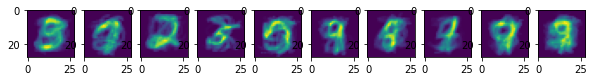

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

from PIL import Image


# Data Preprocessing
train_df = pd.read_csv("mnist_train.csv")

train_images = dict()

label_list= []
for id, row in train_df.iterrows():

    x = row[1:785].to_numpy()
    label_list.append(row[0])
    train_images[id] = {
        'label': row[0],
        'data' : row[1:785].to_numpy()
    } 
    
labels= set(label_list)
# Neural Network Parameters    
eta      = 0.1         # learning rate
tmax     = 100000      # number of iterations
n_output = len(labels) # number of output neurons
n_pixels = 784         # total no. pixels per image
n_samples = 60000      

# Initialize network prototypes
proto = np.random.rand(n_output, n_pixels)        

rng = np.random.default_rng()

# Initialize weights
W = np.random.rand(n_output, n_pixels)
for x in range(n_output):
    W[x] = preprocessing.normalize(W[x].reshape(1, -1))


for b in range(tmax):
    i = rng.integers(n_samples)
    inputx = train_images[i]['data']
    h = 1 / np.linalg.norm(proto - inputx, axis=1)
    
    k = np.argmax(h)
    
    # Apply update rule to winning prototype
    W[k] += eta * (inputx - W[k])
    
# Plot prototypes after training
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))
for output in range(10):
    ax[output].imshow(W[output].reshape((28, 28)))

plt.show()